In [2]:
import control
import matplotlib.pyplot as plt
import numpy as np

## Definicion de variables globales

In [3]:
FIG_PATH = '../Img'

In [4]:
s = control.TransferFunction.s
z = control.TransferFunction.z

In [5]:
def save_path( img_name ):
    return f'{ FIG_PATH }/{img_name}.png'

## Ejercicio 1

In [6]:
G = 1 / ( ( s + 0.2 ) * ( s + 0.3 ) * ( s + 0.5 ) )
G


            1
-------------------------
s^3 + s^2 + 0.31 s + 0.03

In [7]:
e_inf = lambda k_c: 3 / ( 3 + 100 * k_c )

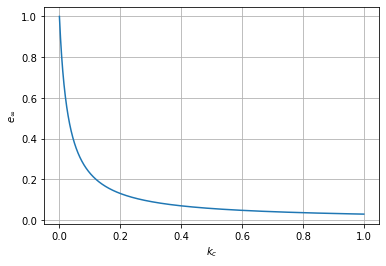

In [8]:
a = 1
k_c = np.linspace( 0 , a , 2000 )
plt.plot( k_c, np.abs( e_inf( k_c ) ) )
plt.xlabel('$k_c$')
plt.ylabel( '$e_{\infty}$' )
plt.grid()
plt.savefig( save_path( '1-a' ) )

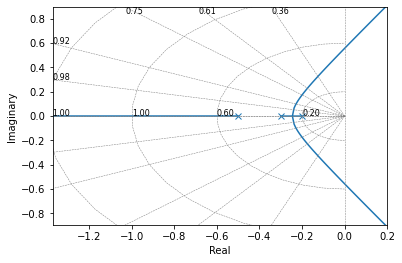

In [9]:
control.rlocus( G )
plt.savefig( save_path( '1-b-lugar-raices' ) )

## Ejercicio 2

In [10]:
G = 1 / ( s**2 - 1 )

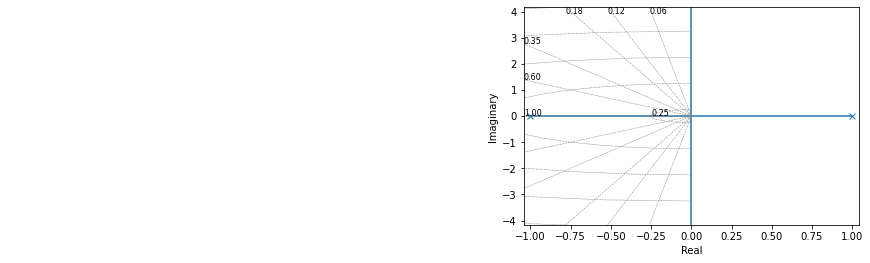

In [11]:
control.rlocus( G )
plt.savefig( save_path( '2-P' ) )

In [12]:
T_i = 1/2
H = ( 1 + T_i * s ) / (T_i * s) * G

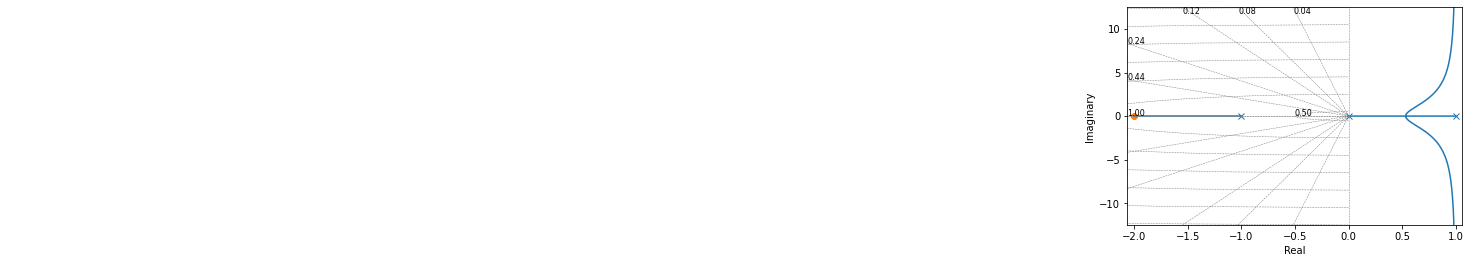

In [13]:
control.rlocus( H )
plt.savefig( save_path( '2-PI' ) )

In [14]:
T_d = 1/2
H = ( 1 + T_d * s ) * G

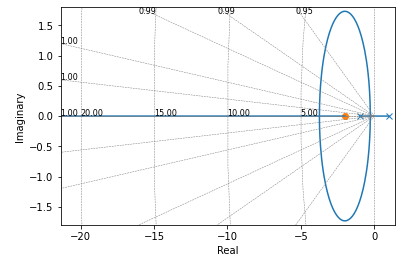

In [15]:
control.rlocus( H )
plt.savefig( save_path( '2-PD' ) )

In [16]:
T_d = 1/2
T_i = 5
H = ( 1 + T_d * s ) * G * ( 1 + T_i * s ) / (T_i * s) 

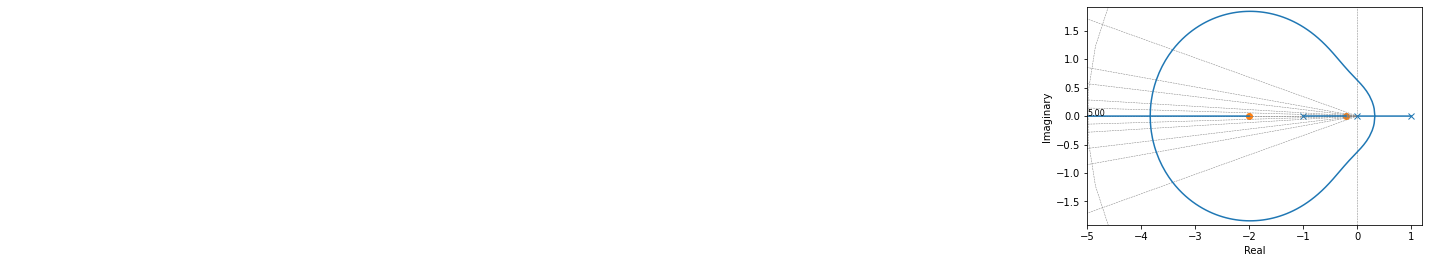

In [17]:
control.rlocus( H )
plt.xlim( [-5, 1.2] )
plt.savefig( save_path( '2-PID' ) )

## Ejercicio 3

In [18]:
H = 4 * ( s + 1 ) / ( s + 2 )
h = 1/4

In [19]:
euler = control.c2d( H, h ,'euler' )
euler


4 z - 3
-------
z - 0.5

dt = 0.25

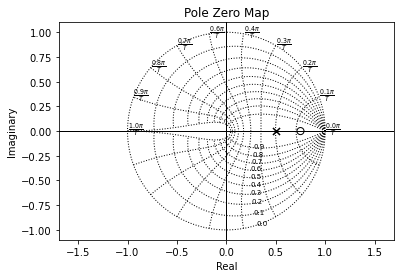

In [20]:
control.pzmap( euler, grid=True )
plt.savefig( save_path( '3-euler' ) )

In [21]:
adelanto = 4 * ( 5 * z - 4 ) / ( 6 * z - 4 )
adelanto


20 z - 16
---------
 6 z - 4

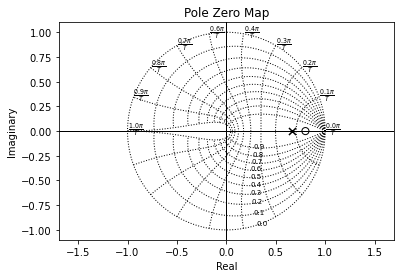

In [22]:
control.pzmap( adelanto, grid=True )
plt.savefig( save_path( '3-adelanto' ) )

In [23]:
tustin = control.c2d( H, h, 'tustin' )
tustin


3.6 z - 2.8
-----------
  z - 0.6

dt = 0.25

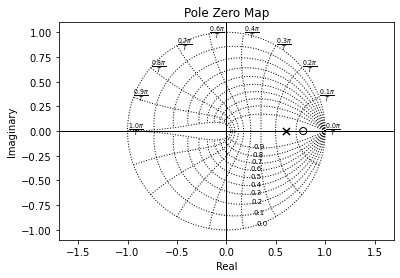

In [24]:
control.pzmap( tustin, grid=True )
plt.savefig( save_path( '3-tustin' ) )

## Ejercicio 5

In [25]:
G = ( s - 1 ) / ( s + 2 )
G_z = control.c2d( G, 1, 'zoh') 

In [26]:
G_z


z - 1.432
----------
z - 0.1353

dt = 1

In [27]:
escalon = lambda t: np.piecewise( t, t>=0, [1, 0] )
x = [ 1 ] + 4 * [ 0 ]
x_c = lambda t: escalon(t)  -  escalon( t -h )
g_escalon = lambda t: ( -1/2 + 3/2 * np.exp( -2*t ) ) *  ( escalon(t) )
g_p = lambda t: g_escalon(t) - g_escalon( t - h )
g_p_d = lambda n: g_p( h * n )

In [28]:
t = np.linspace( -1e-3, 1, 2000 )
n = np.arange( 0, 5, 1 )
h = 0.25

<ipython-input-29-ddc3afdabdaa>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem( n, x )


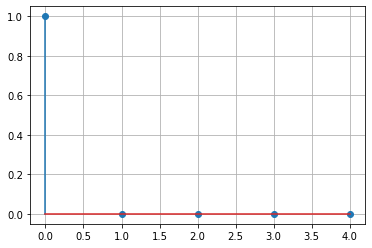

In [29]:
plt.stem( n, x )
plt.grid()
plt.savefig( save_path( '5-input' ) )

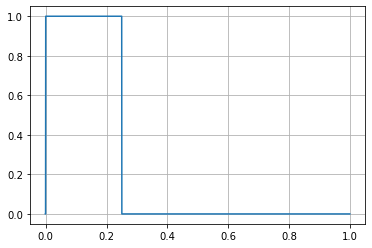

In [30]:
plt.plot( t, x_c(t) )
plt.grid()
plt.savefig( save_path( '5-DAC' ) )

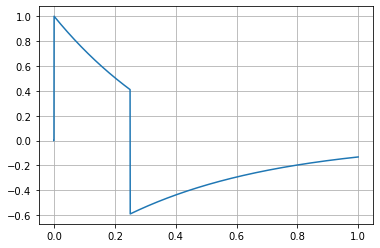

In [31]:
plt.plot( t, g_p(t) )
plt.grid()
plt.savefig( save_path( '5-G-P' ) )

<ipython-input-32-9bce7545dabd>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem( n, g_p_d(n) )


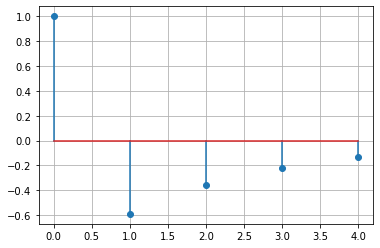

In [32]:
plt.stem( n, g_p_d(n) )
plt.grid()
plt.savefig( save_path( '5-G-P-D' ) )

<ipython-input-33-811b802608e0>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem( n*h, g_p_d(n) )


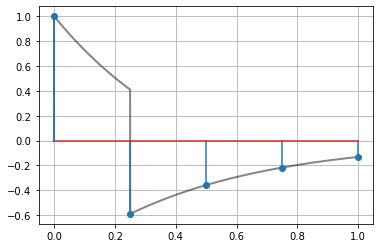

In [33]:
plt.plot( t, g_p(t), '#0000007a', lw=2 )
plt.stem( n*h, g_p_d(n) )
plt.grid()
plt.savefig( save_path( '5-salida' ) )

## Ejercicio 6

In [53]:
A = 117/2500
T_i = 1.77
K = 0.058
G = A  / ( ( s + 0.2 )*(s + 0.13) )
G


       0.0468
--------------------
s^2 + 0.33 s + 0.026

In [63]:
G_c = K * ( 1 + 1 / ( T_i * s ) )
G_d = control.c2d( G_c, 0.25, 'euler' )
G_d


0.058 z - 0.04981
-----------------
      z - 1

dt = 0.25

In [69]:
def g_d(x):
    a = 0.058
    b = 0.049
    y = []
    for i in range( len(x) ):
        if i == 0:
            y.append( a*x[i]   )
        else:
            y.append( a*x[i] - b*x[i-1] + y[ i - 1 ] )
            
    return y

In [70]:
x = [1, 0, 0, 0, 0, 0, 0]
y = g_d( x )

<ipython-input-72-3ec15bd81692>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(y)


<StemContainer object of 3 artists>

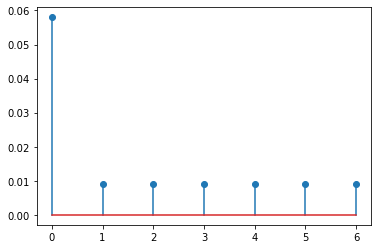

In [72]:
plt.stem(y)

## Ejercicio 7

In [65]:
G = ( 0.4 * s + 1 ) / ( 0.6 * s + 1 )

In [66]:
control.c2d( G, 120/3600, 'zoh' )


0.6667 z - 0.6126
-----------------
    z - 0.946

dt = 0.03333333333333333